This is a Linear Regression Tutorial from both Statistical and Machine Learning point of view. The Dataset used to showcase the benefits of Linear Regression is the Diabetes dataset present in sklearn datasets

Topics Covered-

1) Train Test Split

2) Pearson Correlations

3) Heatmaps

4) P-value analysis for variable selection

5) R squared and Adjusted R squared


In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

In [ ]:
X.shape, y.shape

((442, 10), (442,))

Let's divide our dataset into train and test set

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, y, random_state=100, test_size=0.2)

In [ ]:
### Let's check the shapes
train_X.shape, test_X.shape, train_Y.shape, test_Y.shape

((353, 10), (89, 10), (353,), (89,))

X and y are numpy arrays. X are the input variables and y is the dependent variable

Exploratory Data Analysis

In [ ]:
pd.DataFrame(train_X).corr()

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.166117,0.152261,0.321903,0.283239,0.237212,-0.068921,0.207164,0.289142,0.304168
1,0.166117,1.000000,0.085246,0.214902,0.038061,0.161285,-0.364605,0.328691,0.120756,0.224749
2,0.152261,0.085246,1.000000,0.325748,0.223217,0.252080,-0.373039,0.394169,0.424873,0.360025
3,0.321903,0.214902,0.325748,1.000000,0.199931,0.146559,-0.160822,0.209640,0.360163,0.355181
4,0.283239,0.038061,0.223217,0.199931,1.000000,0.889760,0.043970,0.531183,0.541631,0.311254
5,0.237212,0.161285,0.252080,0.146559,0.889760,1.000000,-0.219411,0.662264,0.342756,0.287678
6,-0.068921,-0.364605,-0.373039,-0.160822,0.043970,-0.219411,1.000000,-0.748456,-0.389185,-0.281690
7,0.207164,0.328691,0.394169,0.209640,0.531183,0.662264,-0.748456,1.000000,0.611751,0.403887
8,0.289142,0.120756,0.424873,0.360163,0.541631,0.342756,-0.389185,0.611751,1.000000,0.470539
9,0.304168,0.224749,0.360025,0.355181,0.311254,0.287678,-0.281690,0.403887,0.470539,1.000000


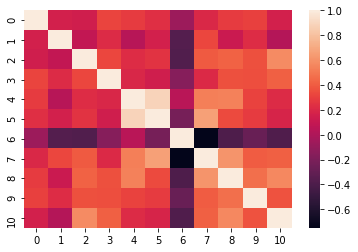

In [ ]:
sns.heatmap(pd.DataFrame(np.concatenate((train_X, train_Y.reshape(-1,1)), axis=1)).corr())

Let's see the distributions of the independent variables and see if they are normally distributed

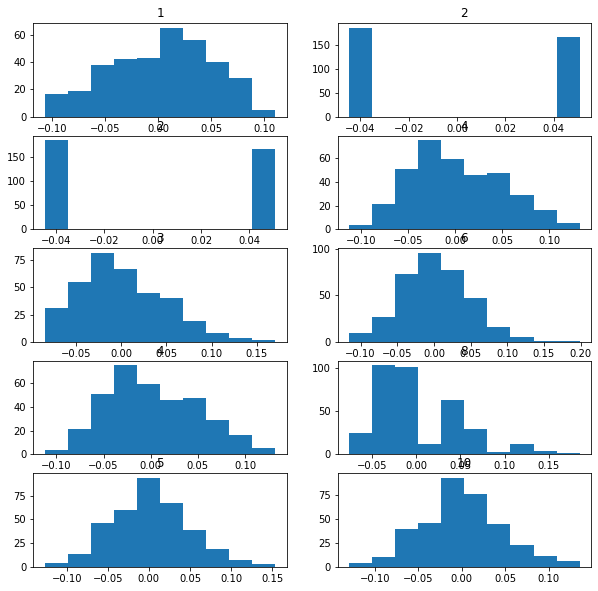

In [ ]:
figure, axis = plt.subplots(5, 2, figsize=(10,10))
for i in range(5):
    for j in range(2):
        axis[i, j].hist(train_X[:,(i+1)*(j+1)-1])
        axis[i, j].set_title(str((i+1)*(j+1)))

X4 seems to be right skewed, so let's normalize this one

(array([ 4., 14., 38., 73., 71., 44., 40., 46., 18.,  5.]),
 array([-0.11923364, -0.09490777, -0.0705819 , -0.04625604, -0.02193017,
         0.0023957 ,  0.02672157,  0.05104744,  0.0753733 ,  0.09969917,
         0.12402504]),
 <a list of 10 Patch objects>)

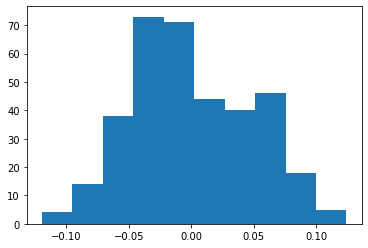

In [ ]:
plt.hist(np.log(train_X[:,3]+1))

This looks normal, so let's assign the transformed X4 to the input X array

In [ ]:
train_X[:,3] = np.log(train_X[:,3]+1)
test_X[:,3] = np.log(test_X[:,3]+1)

Similarly, let's do the transformation for X8

(array([ 31., 136.,  11., 121.,  80.,  39.,   5.,  13.,   5.,   1.]),
 array([-0.07947025, -0.05452917, -0.02958808, -0.004647  ,  0.02029409,
         0.04523517,  0.07017626,  0.09511734,  0.12005843,  0.14499951,
         0.1699406 ]),
 <a list of 10 Patch objects>)

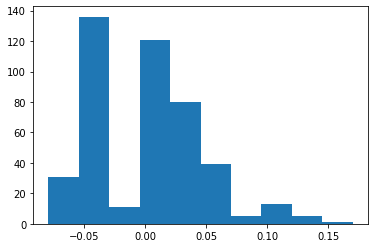

In [ ]:
plt.hist(np.log(X[:,7]+1))

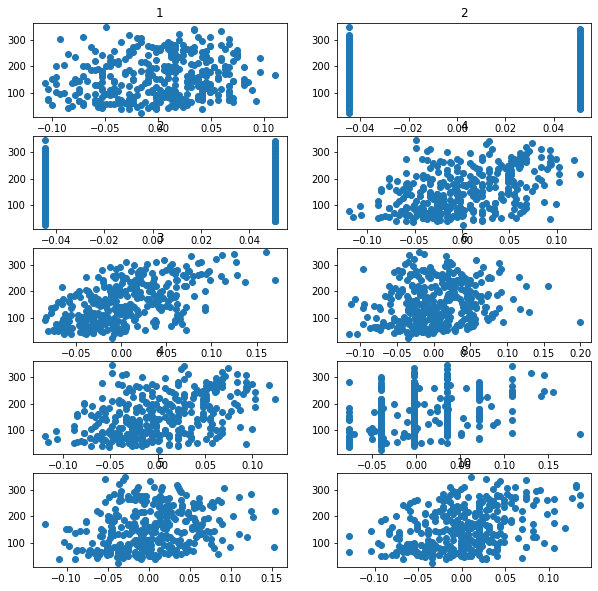

In [ ]:
figure, axis = plt.subplots(5, 2, figsize=(10,10))
for i in range(5):
    for j in range(2):
        axis[i, j].scatter(train_X[:,(i+1)*(j+1)-1], train_Y)
        axis[i, j].set_title(str((i+1)*(j+1)))

In [ ]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sat, 15 May 2021   Prob (F-statistic):           3.83e-62
Time:                        12:14:47   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.0

Show that increasing the number of parameters always increases R squared

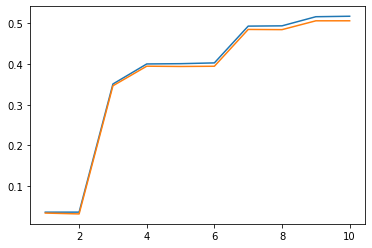

In [ ]:
r_squared_values = []
adjusted_r_squared_values = []
for i in range(1, 11):
    est = sm.OLS(y, X2[:, :(i+1)])
    est2 = est.fit()
    r_squared_values.append(est2.rsquared)
    adjusted_r_squared_values.append(est2.rsquared_adj)

plt.plot(range(1,11), r_squared_values)
plt.plot(range(1,11), adjusted_r_squared_values)

**Sklearn method of Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(train_X,train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.predict(test_X)

array([ 75.49645361,  50.35292067, 182.57147205,  82.92015936,
       114.26153467, 116.32756195, 165.24532564, 250.85330471,
       104.51024058, 215.56129815, 209.0866834 , 176.51472781,
       208.25340574, 220.3691542 , 103.03892476, 149.76189575,
        58.6321711 ,  94.93726821, 194.01384214, 150.2570664 ,
       256.92180371, 215.94675302,  97.26091403, 152.92120251,
       232.40870062, 119.92517405, 283.94196783, 117.6494432 ,
       194.61699003, 171.39740208, 127.09704176, 148.45451723,
       134.18120684, 134.71177107, 180.21258744, 189.1687009 ,
       239.0634963 , 157.84660809, 229.45172944, 197.61394044,
       132.77232008, 158.00930566,  82.83912393, 143.14799159,
        71.34217195, 190.4027467 , 143.2365803 ,  99.34825457,
       237.25608291, 130.13359406, 254.86315954,  72.34351362,
       210.7171494 , 147.39939543,  76.77024347, 158.65017596,
       100.702482  , 291.13145965,  77.64638844, 127.49888144,
        94.86430331, 148.56860268, 118.65244203, 233.55

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(test_Y, model.predict(test_X))

2637.696918141803

In [ ]:
### Find R2 value

print("Train R squared", 1 - mean_squared_error(train_Y, model.predict(train_X)) / mean_squared_error(train_Y, [train_Y.mean()]*train_Y.shape[0]))
print("Test R squared", 1 - mean_squared_error(test_Y, model.predict(test_X)) / mean_squared_error(test_Y, [test_Y.mean()]*test_Y.shape[0]))

Train R squared 0.5163244651700238
Test R squared 0.5036350663725038
